In [1]:
%pylab
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as color
import nugridpy.utils as utils
import sys
import time

# use my branch of PyPPM
sys.path.insert(0,'/user/david/PyPPM/')
from ppmpy import ppm
cb = utils.linestylecb

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


## Reading In MomsData

In [2]:
# Path where momsdata is located (cedar is faster)
moms_path_768 = '/user/cedar_scratch_djstephe/moms-demo/M30-768/myavsbq'
moms_path_1536 = '/user/cedar_scratch_djstephe/moms-demo/M35-1536/myavsbq'
# moms_path_768 = '/user/niagara_scratch_djstephe/momsTesting/moms-demo/M30-768/output_data/myavsbq'
# moms_path_1536 = '/user/niagara_scratch_djstephe/momsTesting/moms-demo/M35-1536/output_data/myavsbq'

# we are working with one dump, choose it to be read in first
dump = 100

# we can time this 768
start_time = time.time()
momsdataset768 = ppm.MomsDataSet(moms_path_768,dump)
print('To read in a moms datacube, '+str(int(768/4.))+'^3 it took {:4.2f} seconds'.format(time.time() - start_time))

print('')

# # we can time this 1536
start_time = time.time()
momsdataset1536 = ppm.MomsDataSet(moms_path_1536,dump)
print('To read in a moms datacube, '+str(int(1536/4.))+'^3 it took {:4.2f} seconds'.format(time.time() - start_time))

111 .aaa files found in '/user/cedar_scratch_djstephe/moms-demo/M30-768/myavsbq/.
Dump numbers range from 0 to 110.
The PPMstar grid is being constructed, this can take a moment
To read in a moms datacube, 192^3 it took 10.01 seconds

438 .aaa files found in '/user/cedar_scratch_djstephe/moms-demo/M35-1536/myavsbq/.
Dump numbers range from 0 to 437.
The PPMstar grid is being constructed, this can take a moment
To read in a moms datacube, 384^3 it took 66.33 seconds


Grab the radial profiles of the run

In [3]:
# grab rprofs
rprof_dir768 = '/user/niagara_projects/PPM2.0/M_H-core-M25/M30-1000x-768_noburn_iscray0/prfs/'
rprof768 = ppm.RprofSet(rprof_dir768)

rprof_dir1536 = '/user/niagara_projects/PPM2.0/M_H-core-M25/M35-1000x-1536-M12clone/prfs/'
rprof1536 = ppm.RprofSet(rprof_dir1536)

681 rprof files found in '/user/niagara_projects/PPM2.0/M_H-core-M25/M30-1000x-768_noburn_iscray0/prfs/.
Dump numbers range from 0 to 680.
Reading history file '/user/niagara_projects/PPM2.0/M_H-core-M25/M30-1000x-768_noburn_iscray0/prfs/HcoreE00768-0000.hstry'.
437 rprof files found in '/user/niagara_projects/PPM2.0/M_H-core-M25/M35-1000x-1536-M12clone/prfs/.
Dump numbers range from 0 to 436.
Reading history file '/user/niagara_projects/PPM2.0/M_H-core-M25/M35-1000x-1536-M12clone/prfs/HcoreE01536-0000.hstry'.


## Temporal and Spatial Resolution

In [4]:
# spatial resolution for 768 momsdata
print('The spatial resolution of 768 momsdata is',str(np.diff(momsdataset768.get_grid()[0])[0]),'Mm')
print('While PPMStar 768 has a spatial resolution of',str(np.diff(momsdataset768.get_grid()[0])[0]/4.),'Mm')

print('')

# spatial resolution for 1536 momsdata
print('The spatial resolution of 1536 momsdata is',str(np.diff(momsdataset1536.get_grid()[0])[0]),'Mm')
print('While PPMStar 1536 has a spatial resolution of',str(np.diff(momsdataset1536.get_grid()[0])[0]/4.),'Mm')

print('')

# what is the extent of the simulation?
print('The extent of the simulation is then',str(np.diff(momsdataset1536.get_grid()[0])[0]/4. * 1536/2.),'Mm')

The spatial resolution of 768 momsdata is 26.0415039062 Mm
While PPMStar 768 has a spatial resolution of 6.51037597656 Mm

The spatial resolution of 1536 momsdata is 13.0209960938 Mm
While PPMStar 1536 has a spatial resolution of 3.25524902344 Mm

The extent of the simulation is then 2500.03125 Mm


In [5]:
# temporal resolution for 768 momsdata
print('The temporal resolution of 768 and 1536 momsdata is the same as the PPMStar output which averages around',
      str(np.mean(rprof768.get_history().get('time(mins)'))),'minutes per dump')

print('')

print('The run-time temporal resolution of the PPMStar output averages around',
      str(np.mean(rprof768.get_history().get('dt(secs)'))),'seconds per cycle')

The temporal resolution of 768 and 1536 momsdata is the same as the PPMStar output which averages around 57528.9294846 minutes per dump

The run-time temporal resolution of the PPMStar output averages around 5.46109271659 seconds per cycle


## Make Rprofs and Plot

In [6]:
ifig = 0

#### 768

In [7]:
# get T9 and Ut
P_rprof = rprof768.get('P0',fname=dump,resolution='h')[0::2] + rprof768.get('P1',fname=dump,resolution='h')[0::2]
rho_rprof = rprof768.get('Rho0',fname=dump,resolution='h')[0::2] + rprof768.get('Rho1',fname=dump,resolution='h')[0::2]
FV_rprof = rprof768.get('FV',fname=dump,resolution='h')[0::2]
T9_rprof = P_rprof * (0.669*FV_rprof + 0.617*(1-FV_rprof)) / (8.31445 * rho_rprof)
R_rprof = rprof768.get('R',fname=dump,resolution='l')
Ut_rprof = rprof768.get('|Ut|',fname=dump)

In [8]:
# make an rprof of temperature and ut
ut_avg, radial_axis = momsdataset768.get_rprof(7,dump)

# first we need to construct T from quantities
mu = 0.669 * momsdataset768.get(6,fname=dump) + (1 - momsdataset768.get(6,fname=dump))*0.617
P = momsdataset768.get(4,fname=dump)
rho = momsdataset768.get(5,fname=dump)
Rgas = 8.31445

# put it all together
T = (mu * P) / (Rgas * rho)

# we can give the rprof method an array to be spherically averaged
T_avg, radial_axis = momsdataset768.get_rprof(T,dump)

<IPython.core.display.Javascript object>


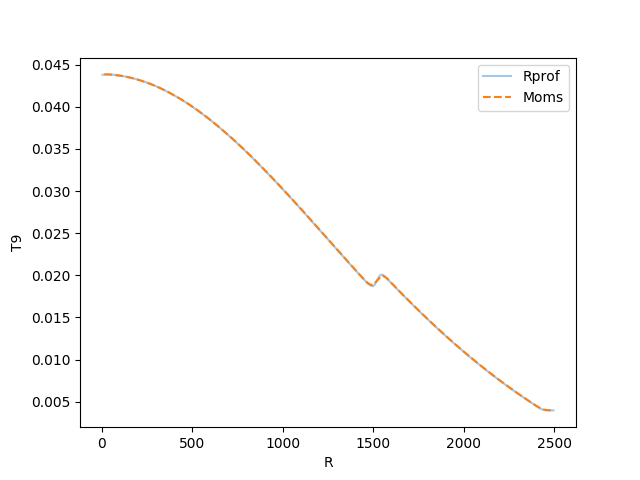

In [9]:
# plot
plt.close(ifig); ifig += 1; plt.figure(ifig)

plt.plot(R_rprof,T9_rprof,label='Rprof',ls=cb(0)[0],color=cb(0)[2])
plt.plot(radial_axis,T_avg,label='Moms',ls=cb(1)[0],color=cb(1)[2])

plt.xlabel('R')
plt.ylabel('T9')

plt.legend()

<IPython.core.display.Javascript object>


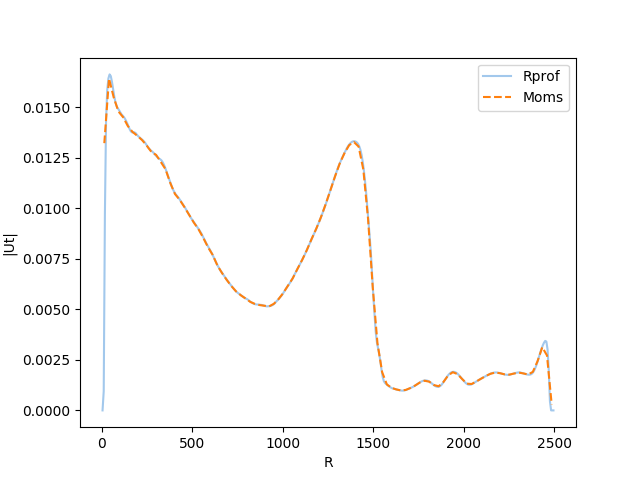

In [10]:
# plot
plt.close(ifig); ifig += 1; plt.figure(ifig)

plt.plot(R_rprof,Ut_rprof,label='Rprof',ls=cb(0)[0],color=cb(0)[2])
plt.plot(radial_axis,ut_avg,label='Moms',ls=cb(1)[0],color=cb(1)[2])

plt.xlabel('R')
plt.ylabel('|Ut|')

plt.legend()

#### 1536

In [11]:
# get T9 and Ut
P_rprof = rprof1536.get('P0',fname=dump,resolution='h')[0::2] + rprof1536.get('P1',fname=dump,resolution='h')[0::2]
rho_rprof = rprof1536.get('Rho0',fname=dump,resolution='h')[0::2] + rprof1536.get('Rho1',fname=dump,resolution='h')[0::2]
FV_rprof = rprof1536.get('FV',fname=dump,resolution='h')[0::2]
T9_rprof = P_rprof * (0.669*FV_rprof + 0.617*(1-FV_rprof)) / (8.31445 * rho_rprof)
R_rprof = rprof1536.get('R',fname=dump,resolution='l')
Ut_rprof = rprof1536.get('|Ut|',fname=dump)

In [12]:
# make an rprof of temperature and ut
ut_avg, radial_axis = momsdataset1536.get_rprof(7,dump)

# first we need to construct T from quantities
mu = 0.669 * momsdataset1536.get(6,fname=dump) + (1 - momsdataset1536.get(6,fname=dump))*0.617
P = momsdataset1536.get(4,fname=dump)
rho = momsdataset1536.get(5,fname=dump)
Rgas = 8.31445

# put it all together
T = (mu * P) / (Rgas * rho)

# we can give the rprof method an array to be spherically averaged
T_avg, radial_axis = momsdataset1536.get_rprof(T,dump)

<IPython.core.display.Javascript object>


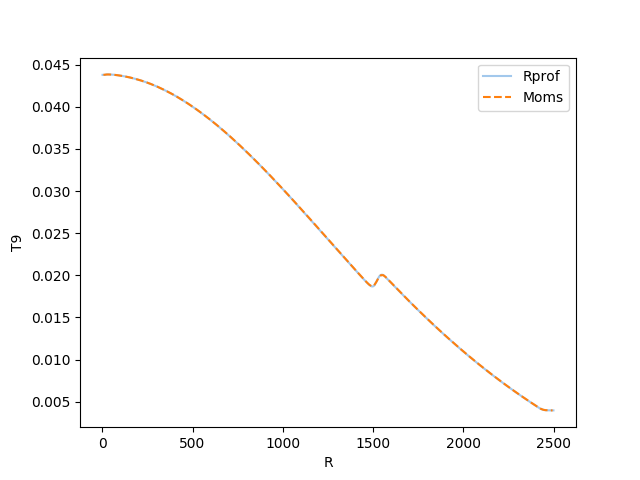

In [13]:
# plot
plt.close(ifig); ifig += 1; plt.figure(ifig)

plt.plot(R_rprof,T9_rprof,label='Rprof',ls=cb(0)[0],color=cb(0)[2])
plt.plot(radial_axis,T_avg,label='Moms',ls=cb(1)[0],color=cb(1)[2])

plt.xlabel('R')
plt.ylabel('T9')

plt.legend()

<IPython.core.display.Javascript object>


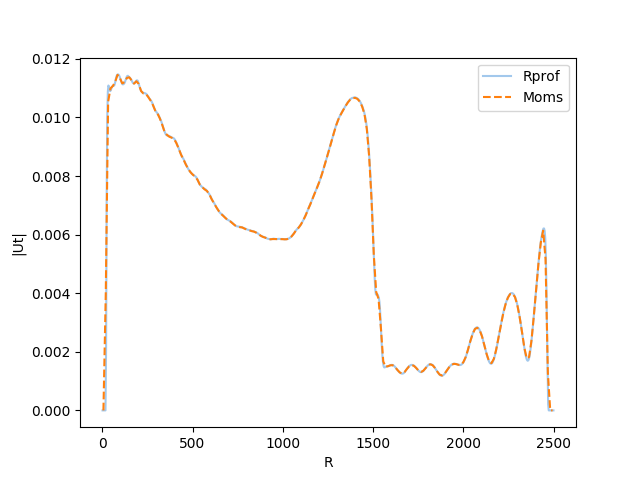

In [14]:
# plot
plt.close(ifig); ifig += 1; plt.figure(ifig)

plt.plot(R_rprof,Ut_rprof,label='Rprof',ls=cb(0)[0],color=cb(0)[2])
plt.plot(radial_axis,ut_avg,label='Moms',ls=cb(1)[0],color=cb(1)[2])

plt.xlabel('R')
plt.ylabel('|Ut|')

plt.legend()

## Make A Planar Slice Image

In [15]:
# grab the grid
x,y,z,r = momsdataset1536.get_grid()

# they are flattened arrays, rearrange
resolution = momsdataset1536.momsdata.resolution
r_matrix = np.reshape(r,(resolution,resolution,resolution))

# extent x,y
extent=[min(x),max(x),min(y),max(y)]

#### Radius

<IPython.core.display.Javascript object>


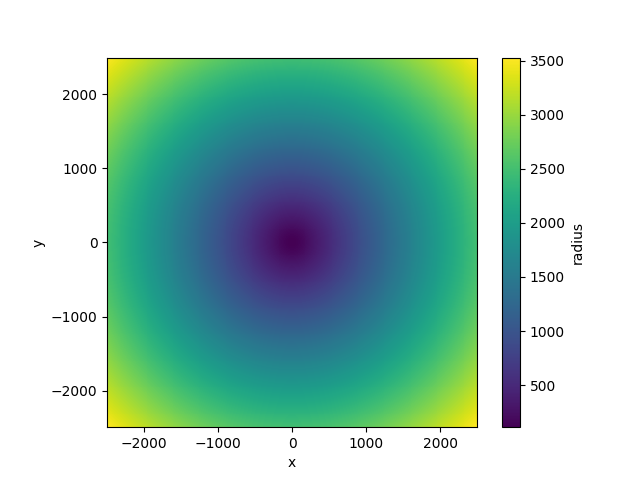

In [16]:
plt.close(ifig); ifig += 1; plt.figure(ifig)
plt.imshow(r_matrix[:][:][200],extent=extent)
plt.ylabel('y')
plt.xlabel('x')
cbar = plt.colorbar()

# label colorbar
cbar.ax.set_ylabel('radius')

#### T9

In [17]:
T_matrix = np.reshape(T,(resolution,resolution,resolution))

<IPython.core.display.Javascript object>


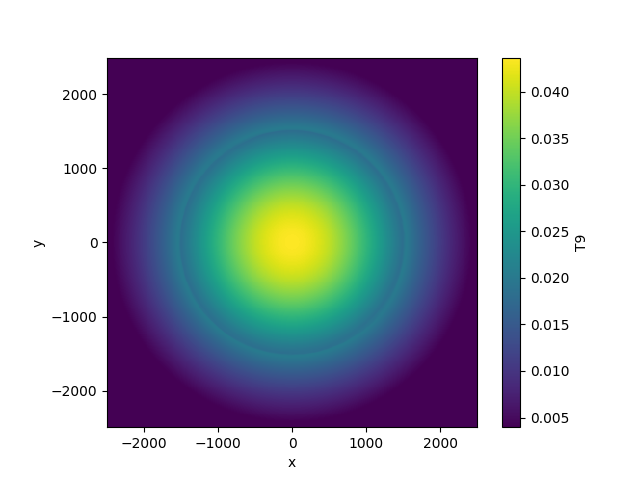

In [18]:
plt.close(ifig); ifig += 1; plt.figure(ifig)
plt.imshow(T_matrix[:][:][200],extent=extent)
plt.ylabel('y')
plt.xlabel('x')
cbar = plt.colorbar()

# label colorbar
cbar.ax.set_ylabel('T9')

## FV Colourmap of a Plane (x=y=0)

In [19]:
# I need to find some plane, could be anything really

# get the unique values in each
uniques = []
for i in range(3):
    uniques.append(np.unique(momsdataset768.get(i,dump)))
    
# I need to set to fix one coordinate, i.e a z value, and then get that plane in the other coordinates
coord1_data = 2
coord1_val = 4
coord1 = uniques[coord1_data][np.argmin(abs(uniques[coord1_data] - coord1_val))]  

coord2_data = 0
coord3_data = 1

# ok, now we need to save the indices 
const_coord1 = np.zeros(int(len(momsdataset768.get(0,dump))/len(uniques[0])),dtype=int)
eps = 1e-3

# loop over uniques
for i in range(len(uniques)):
    
    # we are on a fixed z acrossthe plane
    if i == coord1_data:
        const_coord1 = np.where(abs(momsdataset768.get(2,dump) - coord1) <= eps)[0]

In [20]:
# with the "z" value indexes, we need the 2d array for the plane
# I will first grab all values of x and y and place it in a meshgrid
coord2_vals = np.zeros((int(np.sqrt(len(const_coord1))),int(np.sqrt(len(const_coord1)))))
coord3_vals = np.zeros((int(np.sqrt(len(const_coord1))),int(np.sqrt(len(const_coord1)))))
coord1_index_mesh = np.zeros((int(np.sqrt(len(const_coord1))),int(np.sqrt(len(const_coord1)))))

# get the FV on the plane
fv_bit = np.zeros((int(np.sqrt(len(const_coord1))),int(np.sqrt(len(const_coord1)))))
fv = np.zeros((int(np.sqrt(len(const_coord1))),int(np.sqrt(len(const_coord1))))) 

# start indices at 0
j=0
k=0

for i in range(len(const_coord1)):
    
    # j increments every 194 values
    # k periodically changes
    jprev = j
    j = int(np.floor(i /(momsdataset768.momsdata.resolution))) 
    
    # dont do anything the first time!
    if i != 0:
        if jprev == j:
            k += 1
        else:
            k = 0       
    
    coord1_index_mesh[j][k] = const_coord1[i]
    coord2_vals[j][k] = momsdataset768.get(coord2_data,dump)[const_coord1[i]]
    coord3_vals[j][k] = momsdataset768.get(coord3_data,dump)[const_coord1[i]]
    
    # fv is set to an 8bit number
    fv_bit[j][k] = 251 + 13.35455532 * np.log(max((momsdataset768.get(6,dump)[const_coord1[i]]),1.0e-8))

In [21]:
FV_cmap_str = '''
Anot: 0 0.0       
Anot: 18 0.1058824
Anot: 56 0.2745098
Anot: 75 0.7843137
Anot: 123 1.0 
Anot: 158 1.0
Anot: 184 0.5490196
Anot: 203 0.454902
Anot: 255 0.1254902
Cnot: 0 0.0 0.0 0.0           
Cnot: 48 0.0 0.0 0.2509804    
Cnot: 56 0.0 0.2352941 0.627451
Cnot: 65 0.0 0.7843137 1.0   
Cnot: 75 1.0 1.0 1.0         
Cnot: 100 1.0 1.0 0.0         
Cnot: 186 1.0 0.0 0.0        
Cnot: 244 0.5019608 0.0 0.0   
Cnot: 255 0.5019608 0.0 0.0   
'''
cmap = ppm.colourmap_from_str(FV_cmap_str, segment=(5, 251))

# normalize to our 255 bit range
norm = mpl.colors.Normalize(vmin=5, vmax=251)

#### Image to Fit on Screen

<IPython.core.display.Javascript object>


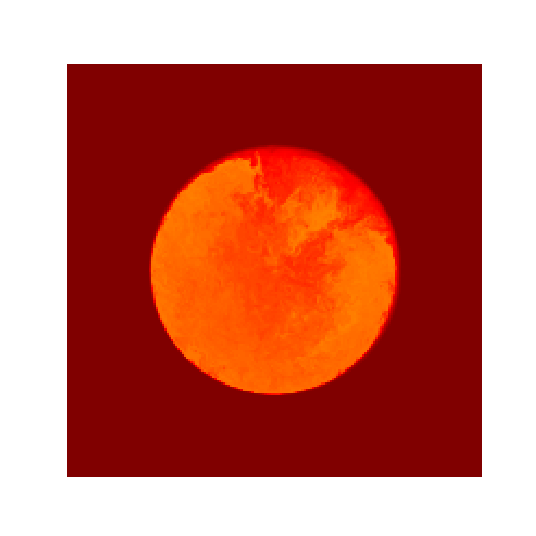

(-2486.97900390625, 2486.979248046875, -2486.97900390625, 2486.979248046875)

In [22]:
my_dpi = 300
plt.close(ifig); ifig+=1; plt.figure(ifig,figsize=(536/my_dpi, 536/my_dpi), dpi=my_dpi)
plt.pcolor(coord2_vals,coord3_vals,fv_bit,cmap=cmap,norm=norm)

plt.axis('off')

#### Higher Resolution Image

<IPython.core.display.Javascript object>


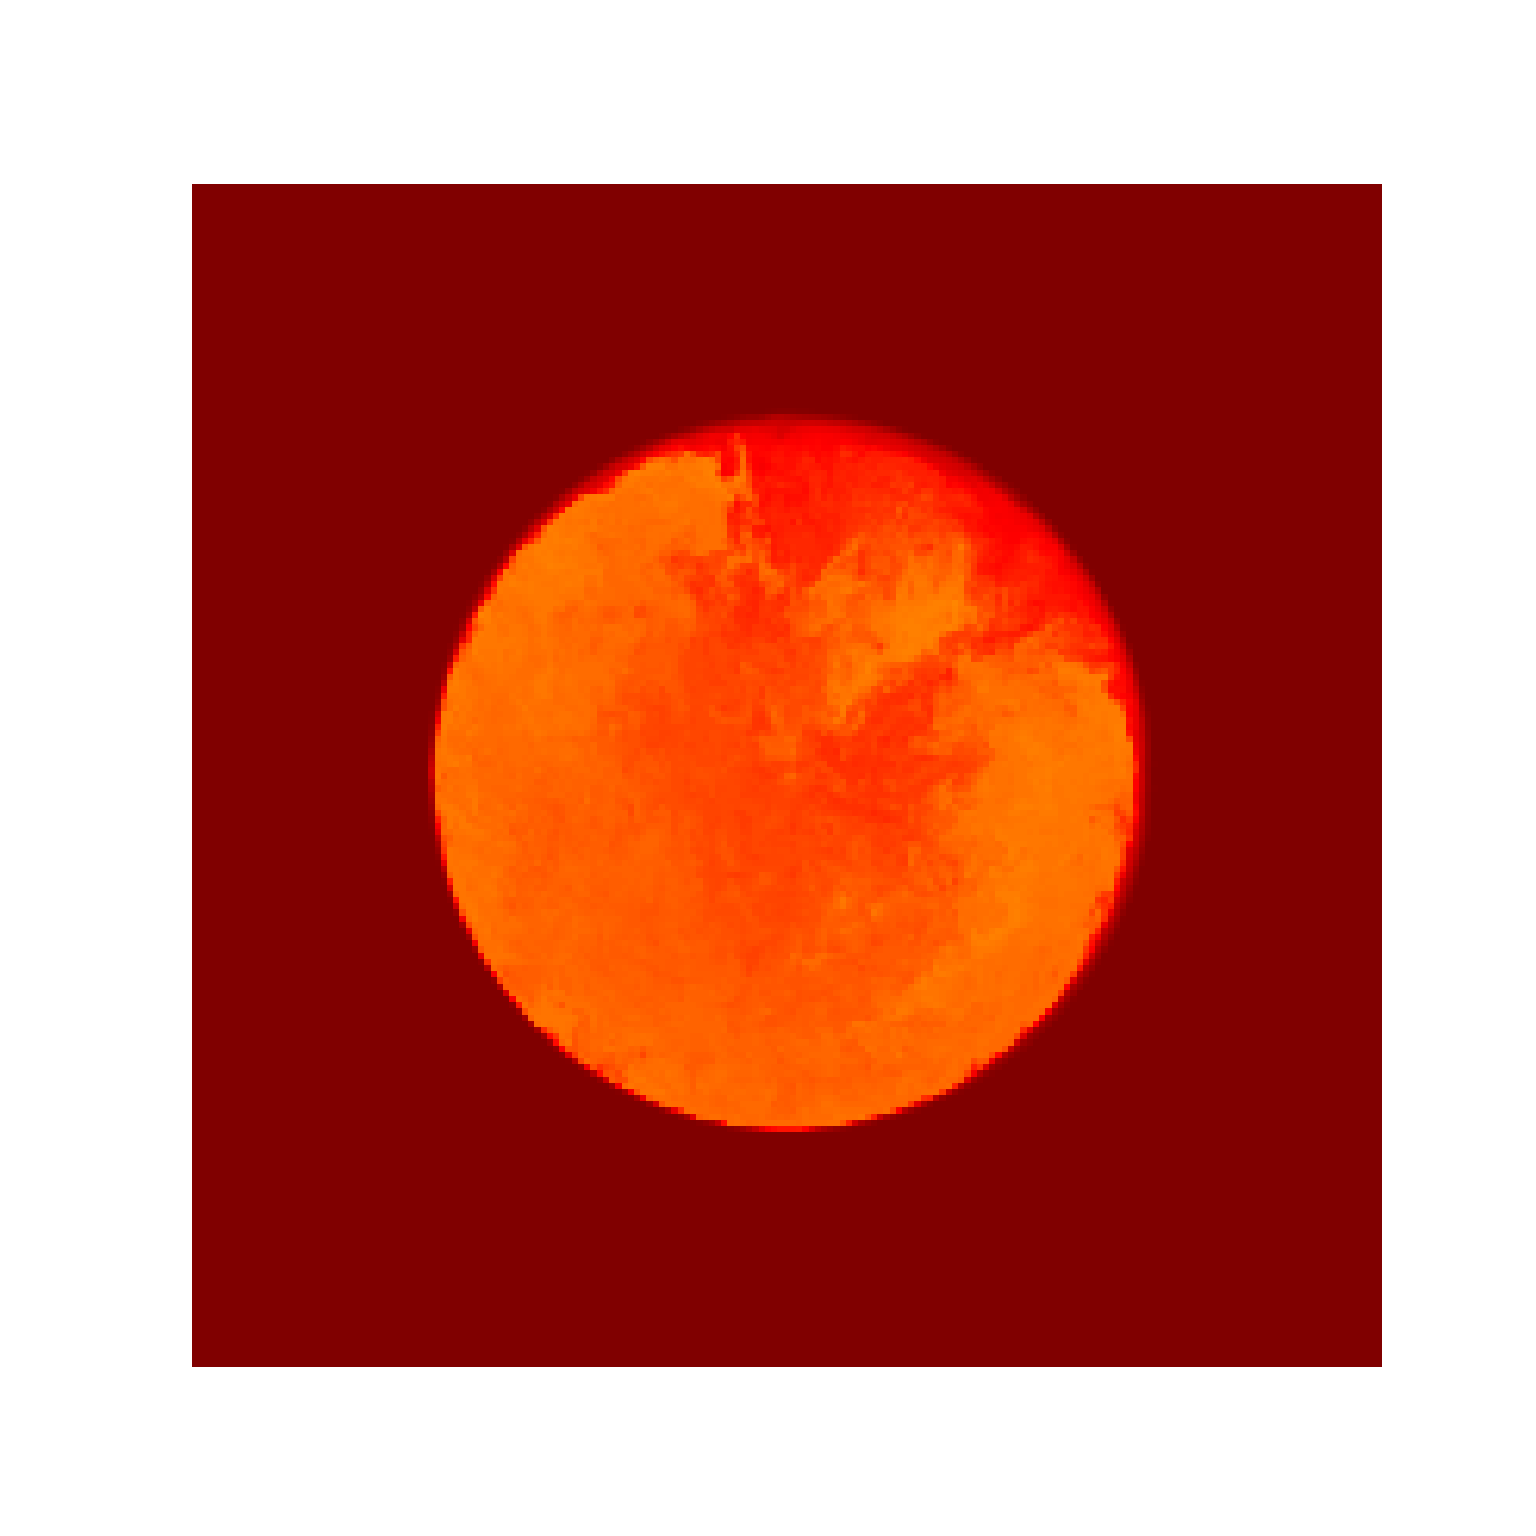

(-2486.97900390625, 2486.979248046875, -2486.97900390625, 2486.979248046875)

In [23]:
my_dpi = 300
plt.close(ifig); ifig+=1; plt.figure(ifig,figsize=(1536/my_dpi, 1536/my_dpi), dpi=my_dpi)
plt.pcolor(coord2_vals,coord3_vals,fv_bit,cmap=cmap,norm=norm)

plt.axis('off')

# savefig 
# plt.savefig('fv.png')